# Vector Exercises: Working With Subsets

## Income Inequality

In these exercises, we will return to the vector with estimates of the total income (from all sources) of a random sample of American households collected by the U.S. Census Bureau between 2015 and 2019 as part of the American Community Survey (ACS).

(As before, apologies to people who are not from the United States -- most of our users come from the US, so picking the United States seemed like the least bad option. However, if you are interested in completing these same exercises for your own country, head over to [IPUMS International](https://international.ipums.org/international/) to see if analogous income data has been made available by your country's Census Bureau. Simply click on the "Browse Data" button, then "Select Sample" in the top left to find the most recent data available for your country. Then see if you can find income data under the "Select Harmonized Variables" "PERSON" or "HOUSEHOLD" drop-down menus. Note that income data is hard to collect, so it's probably not available for most countries.)


### Gini Index

A standard measure of income inequality is the [Gini Index / Gini Coefficient](https://en.wikipedia.org/wiki/Gini_coefficient). The measure takes on a value of 0 when everyone in a population has the same income, and a value of 1 when all the income in population accrues to a single person.

For discrete data, the definition of the Gini Index is given below -- if this type of notation is unfamiliar, don't worry! You don't need to understand it for the following exercises:

$$Gini\ Index = \frac{2 \sum_{i=1}^n i y_i}{n \sum_{i=1}^n y_i} -\frac{n+1}{n}$$

Where $i$ is each households' rank ordering from poorest to richest, and $y_i$ is the income of household $i$. 

We can calculate the Gini Index from a vector of incomes with the following function:

```python
def gini(incomes):

    # Get number of observations
    n = len(incomes)

    # Generate rankings i
    sorted_incomes = np.sort(incomes)
    ranks = np.arange(1, n + 1)
    
    # Top term of left part of equation
    top = 2 * (sorted_incomes * ranks).sum()

    # Bottom term of left part of equation
    bottom = np.sum(sorted_incomes) * n

    # Right part of equation
    correction = (n + 1) / n

    return top / bottom - correction
```



0. If you are familiar with the mathematical summation notation used in the definition of the Gini Index above, take a moment and see if you can work through how the function you have been given is doing the same thing laid out in the equation. This is an example of this style of programming called *vectorization* in which one works with vectors instead of writing out loops.
1. Use the command `np.loadtxt("data/us_household_incomes.txt")` to load the vector of incomes, and make sure to assign the result of that command to a new variable.
2. In a previous reading, we saw that plotting a histogram of US household incomes was difficult because must of the plot was taken up by very high earners. Now that we know how to subset our data, create a histogram of US household incomes that includes only households making less than $500,000. For these households—the non-millionaires—do we see a more uniform distribution of incomes? Or is there still a significant [right-skew / positive-skew](https://en.wikipedia.org/wiki/Skewness) (most people are on the left of the distribution, but there are more extreme values in the right tail) in the income distribution?
3. The US poverty line is *about* 20,000 dollars a year. What share of households in these data fall below the US poverty line?
   - (I say "about" because the actual poverty line for household income depends on the number of people in the household, which we have not included in these data.)
4. Using the `gini` function above, calculate the Gini Index of income inequality in the US. 
5. Go compare your estimate to that of [other countries here.](https://www.indexmundi.com/facts/indicators/SI.POV.GINI/rankings) (Note: in this table, estimated Gini values have been multiplied 100. In addition, as a result of sampling variation, income binning, differences in the exact methods used to calculate income, year of data, availability of data on top incomes, etc., your Gini for the US will be somewhat different from the Gini for the US in this table. It *should* be close to the data from the [US Census Bureau](https://www.statista.com/statistics/219643/gini-coefficient-for-us-individuals-families-and-households/)). How does the US compare to other countries? Is that what you expected? 
   - **Note:** The Gini Index of income is only one metric of inequality! Results would be very different if we were to calculate, for example, the ratio of the income of the top 0.1% of earners to the income of the lowest-earning 10% of the population, or if we calculated this metric using wealth instead of income!
6. Congratulations! You have been hired by the President of the United States to advise them on their efforts to reduce income inequality. The first policy that the president has asked you to evaluate is whether income inequality would be decreased more by giving every household that makes less than 40,000 dollars a check for 5,000 dollars or giving every household that makes less than 30,000 dollars a check for 7,000 dollars. Modify the household incomes in our data to reflect these policies and calculate the resulting Gini Indices. Which is more effective?
   - **Note:** Vectors are mutable (like lists), so you should create a clean copy of your income data with the `.copy()` method (e.g. `experiment1 = income_vector.copy()`) before starting to make changes during each exercise. We'll talk a lot more about vector mutability in a future reading, but so long as you use `.copy()` you will be fine here! 
7. Now the president would like to know whether income inequality can be reduced more through these transfers or by applying a tax of 5% to households making more than 250,000 dollars and use the money to pay down the National Debt. (In other words, reduce the income of any households earning more than 250,000 dollars by 5%.) Calculate the consequence of such a tax on the Gini Index. Would that policy be more or less effective than transfers to low earners?
8. Now suppose we were thinking about applying a 5% tax to people making more than 250,000 dollars and *evenly distributed that tax revenue* to households earning less than 30,000 dollars. Call this *Policy Option A*. To estimate the effective such a policy on inequality, first calculate the total amount of money that would be generated by this tax (i.e.the total amount that incomes have been decreased).
   - **Note:** because these data are just a *sample* of households in the US, the quantity you calculate isn't the actual revenue such a tax would generate in the real world; if you want to calculate the real amount that would be raised, you can multiply the quantity you calculate by 137 (our data include about 1 out of every 137 households in the US).
9. Now calculate the total number of households earning less than 30,000 dollars in these data, and divide the revenue generated by the tax by the number of households earning less than 30,000 dollars. 
   - **Note:** unlike in Question 8, the quantity you estimate here *is* a good estimate of the amount of money that would be available for each household if we imposed this tax on the real world. Why? Because both the quantity you estimated in Question 8 *and* the number of households you calculate here represent 1/137th the actual, real world quantities in the United States. So when you divide one by the other, you get the true ratio -- the fact that both are 1/137th the real quality cancels out!
10. Finally, update the incomes in our data *as if* we had enacted this policy -- reduce the incomes of households earning more than 250,000 dollars by 5% and increase the incomes of households earning less than 30,000 dollars by the quantity you estimated in Question 8. What is the resulting Gini Index of *Policy Option A*?
11. Now suppose we also wanted to explore a slightly different intervention: *Policy Option B*. In *Policy Option B*, we would distribute the revenue generated with the same tax, but this time we would distribute it evenly to all households earning less than 40,000 dollars (instead of less than 30,000 dollars). Would *Policy Option B* have a larger or smaller effect on the Gini Index?
12. If the President asked you whether you could better reduce inequality (as measured by the Gini Index) by re-distributing the tax revenue from taxing households earning more than 250,000 dollars even to households earning less than 30,000 dollars (*Policy Option A*) or households earning less than 40,000 dollars (*Policy Option B*), which would you recommend?


### Data Citation

The ACS data used in this exercise are a subsample of the IPUMS USA data available from [usa.ipums.org.](usa.ipums.org)

Please cite use of the data as follows: Steven Ruggles, Sarah Flood, Sophia Foster, Ronald Goeken, Jose Pacas, Megan Schouweiler and Matthew Sobek. IPUMS USA: Version 11.0 [dataset]. Minneapolis, MN: IPUMS, 2021. https://doi.org/10.18128/D010.V11.0

These data are intended for this exercise only. Individuals analyzing the data for other purposes must submit a separate data extract request directly via IPUMS USA.

Individuals are not to redistribute the data without permission. Contact ipums@umn.edu for redistribution requests.

## Solutions

In [5]:
# Question 1

import numpy as np
incomes = np.loadtxt("data/us_household_incomes.txt")


(array([262190., 338722., 173615.,  76580.,  33854.,  16134.,   8329.,
          5401.,   4556.,   4038.]),
 array([-16942.,  34752.,  86446., 138140., 189834., 241528., 293222.,
        344916., 396610., 448304., 499998.]),
 <BarContainer object of 10 artists>)

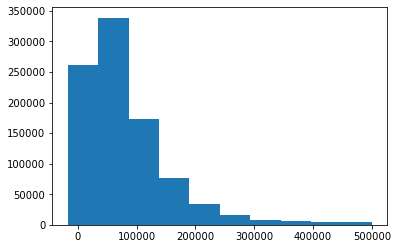

In [6]:
# Question 2
from matplotlib import pyplot as plt
plt.hist(incomes[incomes < 500_000])

In [7]:
# Still strong right skew!

In [8]:
# Question 3

# This can be calculated a number of ways. Here are two:
np.mean(incomes < 18_000)

0.12965475878097238

In [9]:
len(incomes[incomes < 20_000]) / len(incomes)

0.14711442173300704

In [10]:
# Question 4

def gini(incomes):

    # Get number of observations
    n = len(incomes)

    # Generate rankings i
    sorted_incomes = np.sort(incomes)
    ranks = np.arange(1, n + 1)
    
    # Top term of left part of equation
    top = 2 * (sorted_incomes * ranks).sum()

    # Bottom term of left part of equation
    bottom = np.sum(sorted_incomes) * n

    # Right part of equation
    correction = (n + 1) / n

    return top / bottom - correction

gini(incomes)

0.4810920394460463

In [13]:
# Question 6

experiment1 = incomes.copy()
cutoff = 40_000
experiment1[experiment1 < cutoff] = experiment1[experiment1 < cutoff] + 5_000
gini(experiment1)

0.4602463578326137

In [12]:
# Could also be done with +=, but haven't shown that trick explicitly so not doing.

experiment2 = incomes.copy()
cutoff = 30_000
experiment2[experiment2 < cutoff] = experiment2[experiment2 < cutoff] + 7_000
gini(experiment2)

# So the 7K to < 30_000 helps more. 

0.4582816870668216

In [14]:
# Question 7

experiment3 = incomes.copy()
cutoff = 250_000
experiment3[experiment3 > cutoff] = experiment3[experiment3 > cutoff] * 0.95
gini(experiment3)


0.47561687501193584

In [8]:
# Well that barely did anything at all!

In [15]:
# Question 8
experiment4 = incomes.copy()
tax_cutoff = 250_000
tax = 0.05

# Calculate transfers
tax_revenue = np.sum(tax * experiment4[experiment4 > tax_cutoff])
tax_revenue


929623340.85

In [16]:
# Question 9

credit_cutoff = 30_000
num_hh_under_30k = np.sum(experiment4 < credit_cutoff)
per_hh = tax_revenue / num_hh_under_30k
per_hh


4208.230382379836

In [17]:
# Question 10

experiment4[experiment4 < credit_cutoff] = experiment4[experiment4 < credit_cutoff] + per_hh
experiment4[experiment4 > tax_cutoff] = experiment4[experiment4 > tax_cutoff] * (1 - tax)
gini(experiment4)

0.4616685112625194

In [12]:
# Question 10

experiment5 = incomes.copy()
credit_cutoff = 40_000
num_hh_under_40k = np.sum(experiment5 < credit_cutoff)
per_hh = tax_revenue / num_hh_under_40k
per_hh


3065.8580323397687

In [13]:
experiment5[experiment5 < credit_cutoff] = experiment5[experiment5 < credit_cutoff] + per_hh
experiment5[experiment5 > tax_cutoff] = experiment5[experiment5 > tax_cutoff] * (1 - tax)
gini(experiment5)

0.462648124141809

In [18]:
## Question 12

# Redistribution to households earning less than 30,000.